<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.uoc.edu/content/dam/news/images/noticies/2016/202-nova-marca-uoc.jpg", align="left" width="380" height="120">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.893 - Análisis de textos</p>
<p style="margin: 0; text-align:right;">Máster en Ciencia de Datos </p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicaciones</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>


# Procesamiento y análisis de información textual (PRA1)

En la PRA1 trabajaremos con un dataset de reseñas (opiniones o reviews) y lo analizaremos siguiendo un conjunto de tareas: pasando por la preparación y limpieza de los datos, hasta la evaluación de modelos de clasificación de sentimientos. Por lo tanto, los objetivos de esta actividad son:

- Aplicar técnicas de procesamiento de lenguaje natural para limpiar y preprocesar los datos del dataset elegido.
- Implementar algoritmos de aprendizaje automático, como LDA y clasificación supervisada, para analizar los textos de las reseñas.
- Evaluar el rendimiento de los modelos creados, utilizando las métricas adecuadas

Entonces, en esta primera práctica, revisaremos y aplicaremos los conocimientos aprendidos en los primeros módulos de la asignatura. Concretamente trataremos los siguientes temas.

<ul>
<li>1. Elección y preparación del dataset (10%).
<li>2. Obtención de datos (30%).
<li>3. Detección de temas (30%).
<li>4. Clasificación automática de opiniones positivas y negativas (20%).
<li>5. Evaluación (10%).
</ul>
  
A continuación, se describe la estructura de la práctica a realizar. Considerar que por cada apartado, se han planteado varios ejercicios a resolver; y en algunos pocos casos, se deja la solución para orientar un poco mejor el desarrollo.

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# 1. Elección y preparación del dataset


## 1.1. Descripción y carga del dataset

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 1em;">

<strong>Ejercicio 1.1.1:</strong> En palabras, describir el título del dataset seleccionado, la dirección original (fuente), y una descripción del mismo.

</div>

#############################################

**Título**:

Yelp Coffee Reviews

**Fuente**:

https://www.kaggle.com/datasets/sripaadsrinivasan/yelp-coffee-reviews

**Descripción**:

El dataset está compuesto por 7616 opiniones de las cafeterías de la ciudad de Austin.
        
#############################################




<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 1em;">

<strong>Ejercicio 1.1.2:</strong> Carga del dataset y descripción de sus principales características: tamaño, estructura, distribución de clase/rating, distribución de longitudes de texto, exploración preliminar del texto de las opiniones (orientada a descubrir potenciales tareas de limpieza a realizar).

</div>

<b>Importante</b>: En caso de haber elegido un dataset sin una columna que denote el sentimiento de cada texto, pero, sí el rating, en este ejercicio, agregar una nueva columna de sentimiento. Por ejemplo, si tenemos los valores 1 a 5 para rating, podríamos considerar a los valores de 1 y 2, como sentimiento negativo (0), y a los valores 4 y 5 como positivo (1). Por ahora, nos vamos a centrar en la clasificación binaria, por tanto, no es necesario considerar a los valores de sentimiento “neutral” o rating=3




In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
#############################################
# SOLUCIÓN                                  #
#############################################
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/UOC/Análisis_de_textos/PRA1/dataset/raw_yelp_review_data.csv'
df = pd.read_csv(file_path)

# Tamaño
print(f'\nTamaño del dataset: {df.shape}')
df.sample(5, random_state=42)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Tamaño del dataset: (7616, 3)


,coffee_shop_name,full_review_text,star_rating
1321,Flitch Coffee,12/9/2015 What a cool place! Real baristas no...,5.0 star rating
3007,Halcyon,12/4/2016 1 check-in Listed in ATX The vibe i...,2.0 star rating
1972,Epoch Coffee,7/9/2014 Updated review I like Epoch coffee s...,3.0 star rating
132,Vintage Heart Coffee,5/26/2016 This place is soooo rockin! The sta...,5.0 star rating
1430,Caffe Medici,2/7/2014 I have never had a great experience ...,2.0 star rating


El dataset contiene 7616 instancias.

En cuanto a la estructura, tiene 3 atributos:
- "coffee_shop_name": nombre del establecimiento.
- "full_review_text": texto de la reseña.
- "star_rating": puntuación en número de estrellas.  

Ahora realizaremos varias exploraciones y visualizaciones para ir comprendiendo el dataset y detectar las posibles tareas de limpieza a realizar.

- Primero, eliminamos la primera columna ya que no nos hará falta en nuestro análisis.
- A continuación, transformamos la columna de puntuaciones obteniendo la puntuación del texto y almacenándola como float.
- Finalmente, añadimos columna clasificando las puntuaciones como 1 si son mayores de 3 y como 0 si son menores de 3.  
Previamente, hemos eliminado las filas con puntuación de 3 estrellas (738 filas) por no poder clasificarlas como positivas ni como negativas.

In [ ]:
# Eliminamos columna de nombre de establecimiento
try:
    df = df.drop(columns = 'coffee_shop_name')
except:
    print('Columna previamente eliminada.')

# Obtenemos la puntuación en formato float de la cadena de texto de la columna star_rating
try:
    df['star_rating'] = df.star_rating.str.extract(r'([\d\.]+)').astype(float)
except:
    print('Puntuación previamente extraída.')

# Eliminamos reseñas de 3 estrellas
df = df[df.star_rating != 3]
print(f'Muestra: {df.shape}')

# Convertimos puntuaciones en 1 si >3 o 0 si <3
df['sentiment'] = np.where(df['star_rating'] > 3, 1, 0)
print(f'Muestra: {df.head()}')

Muestra: (6878, 2)
Muestra:                                     full_review_text  star_rating  sentiment
0   11/25/2016 1 check-in Love love loved the atm...          5.0          1
1   12/2/2016 Listed in Date Night: Austin, Ambia...          4.0          1
2   11/30/2016 1 check-in Listed in Brunch Spots ...          4.0          1
3   11/25/2016 Very cool decor! Good drinks Nice ...          2.0          0
4   12/3/2016 1 check-in They are located within ...          4.0          1


- Graficamos un histograma para tener una idea de la distribución de las reseñas numéricas y ver el poncentaje de cada clase:

,proportion
sentiment,
1,89.270137
0,10.729863


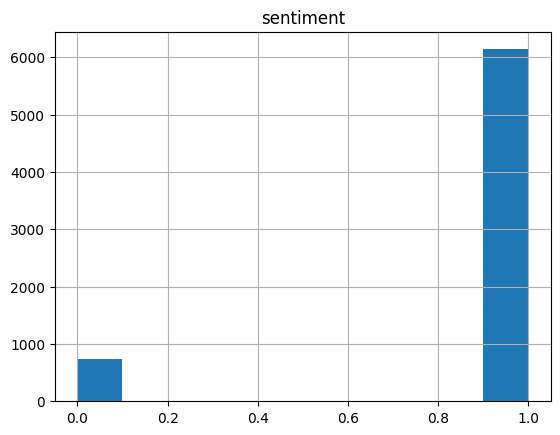

In [ ]:
# Distribución de clase/rating
df.hist(column='sentiment')

# Distribución de calificaciones por sentimiento:
df['sentiment'].value_counts(normalize=True) * 100 # valor porcentual

Podemos observar que hay más calificaciones positivas que negativas. 9 de cada 10 clientes ha realizado una reseña positiva.

- Graficamos a longitud de las palabras de cada reseña:

<Axes: >

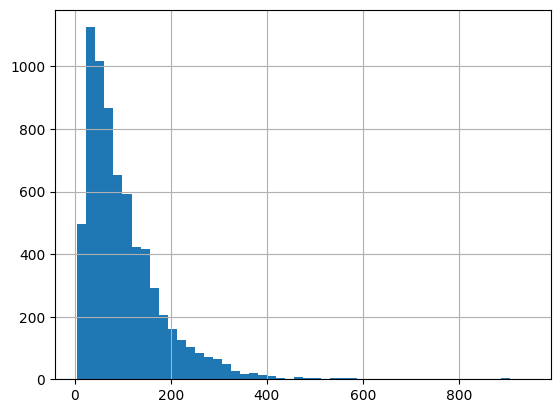

In [ ]:
# Distribución de longitudes de texto
def words_counter(text):
    if type(text) != float:
      return len(text.split()) # contar palabras de cada reseña
    else:
      return None

df['text_length'] =  df['full_review_text'].apply(words_counter)

# Graficar histograma de longitud de textos:
df.text_length.hist(bins=50)

En nuestro caso también podemos ver que hay algunas reseñas bastante cortas.

In [ ]:
  #Reseñas muy cortas:
df[df.text_length<8]

,full_review_text,star_rating,sentiment,text_length
1587,11/17/2016 chill staff and atmosphere,5.0,1,5
2129,3/16/2016 Great Americano and fast service.,4.0,1,6
2136,2/9/2016 Excellent Vanilla Latte and Awesome ...,5.0,1,7
2207,2/8/2015 Place is small but killer coffee.,5.0,1,7
2227,10/27/2014 This coffee shop has great staff!,4.0,1,7
2416,"4/13/2012 Knowledgable, local and friendly.",5.0,1,5
2430,10/24/2010 Fantastic place to buy coffee beans.,4.0,1,7
3753,7/10/2015 Weird music. But awesome coffee!,5.0,1,6
5625,11/25/2015 Great ambiance and lots of seating!,5.0,1,7
5865,11/17/2016 Super strong cold brew!!! Great at...,5.0,1,7


Tras mostrarlas, vemos que todas tienen por lo menos 4 palabras (no contamos la fecha, se eliminará posteriormente en la limpieza del dataset) y todas son bastante comunicativas. Por lo que decidimos mantenerlas.

**Exploración preliminar del texto de las opiniones:**
- La primera columna del dataset contiene el nombre del establecimiento. Para este análisis no lo necesitamos (eliminada en el código anterior).
- Las puntuaciones son una cadena de texto del tipo " 5.0 star rating ". Anteriormente hemos transformado esta columna para poder obtener la distribución de reseñas positivas y negativas.
- El texto de las reseñas empieza con la fecha de publicación.
- Gran parte de las reseñas, después de la fecha, incluye un número seguido de la cadena chech-in. Por ejemplo "2 check-in". Parecen indicar el número de veces que el cliente ha ido a ese establecimiento.
- Los textos contienen elementos como:
  - urls
  - palabras en mayúsculas
  - nombres (algunos representan comidas que ofrecen o el nombre del establecimiento)
  - expresiones como $$$ para expresar precio alto
  - expresiones como "meh" o "Yum" o "OHHHH"
  - carácteres redundantes como "!!!" o "???"

## 1.2 Limpieza de texto

Antes de trabajar con los textos de las reseñas, hay que limpiarlos. En general, dependiendo del dataset podría ser necesario:

1. Eliminar menciones (@), hashtags (#), o código HTML.
2. Eliminar páginas web.
3. Corregir palabras mal escritas (las que resalten en el corpus).
4. Eliminar duplicados.
5. Convertir contracciones, (por ejemplo, en lugar de wouldn't, se cambiaría a would not).
6. Filtrar tokens no alfabéticos.
7. Filtrar signos de puntuación (!) y quitar espacios doble. Se recomienda no quitar el "." porque luego se usará este signo para crear la lista de sentencias. Como referencia ver el ejemplo de PRA proporcionado (*Ejemplo_PRA1.ipynb*).
9. Convertir texto a minúsculas.

Por cada punto, realizar las verificaciones necesarias para determinar la existencia de cada elemento mencionado en el punto anterior (menciones, hashtags, código HTML, páginas web, etc.) e implementar las acciones de limpieza (según se requiera).

<b>IMPORTANTE</b>:
- Antes de implementar cualquier acción, se sugiere crear una columna, llamada *text*, a partir del contenido de la columna de texto original del datset elegido; y sobre la nueva columna aplicar las tareas de limpieza.
- Por cada acción de limpieza realizada, enlistar al menos una reseña que muestre que la función implementada funciona. Es decir, presentar el texto original y el texto transformado (*text*).
- Agregar las celdas de texto y código necesarias, de tal manera que se realice las verificaciones sugeridas, y se dé solución a los problemas de calidad de datos encontrados. Como orientación, se recomienda revisar el archivo <b>Ejemplo_PRA1.ipynb</b> para ver la mejor forma de organanizar la solución.

In [ ]:
# Exploración preliminar del texto de las opiniones (orientada a descubrir potenciales tareas de limpieza a realizar)
#Crear la columna 'text' para aplicar en ella las tareas de preprocesamiento y limpieza:
#df['text'] = df['reviewText'] # Especificar el nombre de la columna del dataset elegido y el nombre del dataframe.

In [ ]:
#############################################
#SOLUCIÓN
#############################################
df['clean_text'] = df['full_review_text']

En nuestro caso, primero vamos a eliminar la fecha que hay al comienzo de cada reseña.

**Ejercicio**: eliminar la **fecha** que aparece en el inicio de cada reseña.

In [ ]:
import random

if df['clean_text'].equals(df['full_review_text']): # Control para que solo se pueda eliminar 1 vez.
# Eliminamos la fecha que aparece al inicio de cada reseña
    df['clean_text'] = df['clean_text'].str.split(' ',n=2).str[2]

# Evidenciar el cambio en una reseña:
pd.set_option('display.max_colwidth', 150)
df.iloc[0][['full_review_text', 'clean_text']]

,0
full_review_text,"11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the m..."
clean_text,"1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte,..."


**Ejercicio**: eliminar **cadenas del tipo "check-in 2"**.

In [ ]:
import string, re

# Función para reemplazar ciertos signos de puntuación:
def clean_check_in(text):
    text = re.sub('[1-9]+ check-in(s)?','', text)
    return text

# Aplicar la función a la columna 'text'
df['clean_text'] = df['clean_text'].apply(clean_check_in)

print(df.iloc[5][['full_review_text', 'clean_text']]) # caso con check-in
print(df.iloc[6][['full_review_text', 'clean_text']]) # caso con check-ins

full_review_text     11/20/2016 1 check-in Very cute cafe! I think from the moment I stepped in, there really wasn't anything I didn't find cute at The Factory. From ...
clean_text           Very cute cafe! I think from the moment I stepped in, there really wasn't anything I didn't find cute at The Factory. From their decor to their c...
Name: 5, dtype: object
full_review_text     10/27/2016 2 check-ins Listed in "Nuptial Coffee Bliss!", Anderson Lane is the new Black Oh hey, the pro vs con format. I've never used that befo...
clean_text           Listed in "Nuptial Coffee Bliss!", Anderson Lane is the new Black Oh hey, the pro vs con format. I've never used that before. Let's try it:  Pros...
Name: 6, dtype: object


Vemos que la cadena de texto "Listed in" aparece sospechosamente al inicio de varias reseñas. Por lo que contamos cuántas veces aparece.

In [ ]:
len(df[df['clean_text'].str.contains('Listed in ')])

488

La cadena de texto aparece 488 veces. Hemos revisado el dataset y entendemos que esto se refiere a que la cafetería está listada dentro de algún grupo.  
Dado que hay una gran variedad de nombres de grupos, y tienen una longitud variable entre 1 y 4 palabras mayoritariamente, no es posible eliminarlos todos de forma automática correctamente. Por lo que, teniendo en cuenta que las filas que contienen esta cadena representan solamente el 7% del dataset, consideramos que la mejor opción es eliminarlas.  

**Ejercicio**: eliminar filas que contengan la **cadena "Listed in"**.

In [ ]:
df = df[~df['clean_text'].str.contains('Listed in', case=False, na=False)]

# Comprobamos que ya no hay filas que contengan esa cadena de texto.
len(df[df['clean_text'].str.contains('Listed in ')])

0

En este caso también tenemos contracciones que tratar.

In [ ]:
#Observemos un texto con contracciones ("don't", "it's"):
df[df['clean_text'].str.contains("'", case=False, na=False)].head(3)

,full_review_text,star_rating,sentiment,text_length,clean_text
5,"11/20/2016 1 check-in Very cute cafe! I think from the moment I stepped in, there really wasn't anything I didn't find cute at The Factory. From ...",4.0,1,189,"Very cute cafe! I think from the moment I stepped in, there really wasn't anything I didn't find cute at The Factory. From their decor to their c..."
7,11/2/2016 2 check-ins Love this place! 5 stars for cleanliness 5 stars for fun ambiance/ open space 5 stars for ample seating and comfort 5 star...,5.0,1,317,Love this place! 5 stars for cleanliness 5 stars for fun ambiance/ open space 5 stars for ample seating and comfort 5 stars for convenient parki...
13,12/5/2016 This is such a cute little cafe! I've driven by this place many times and hadn't noticed it until today. Glad I stopped-the famous chic...,5.0,1,29,This is such a cute little cafe! I've driven by this place many times and hadn't noticed it until today. Glad I stopped-the famous chicken waffle ...


**Ejercicio**: Tratamiento de **contracciones** (una contracción es la forma abreviada de una palabra, como "don't") a su forma completa (como, "do not"). La expansión de las contracciones puede ser útil para mejorar la identificación de stopwords.

In [ ]:
!pip install contractions # Instalar la librería contractions para resolver la tarea:

import contractions

# Aplicar la función fix.
df['clean_text']=df['clean_text'].apply(lambda x:contractions.fix(x))

#Evidenciar el cambio en una reseña:
df.iloc[35][['full_review_text', 'clean_text']]

,44
full_review_text,"11/14/2016 Enthusiastic and earnest desire to be excellent, try new things and develop new menu ideas, smiles, not in your face - best almond pou..."
clean_text,"Enthusiastic and earnest desire to be excellent, try new things and develop new menu ideas, smiles, not in your face - best almond pound cake I ha..."


**Ejercicio**: eliminar **páginas web**.

In [ ]:
rows_with_url = df[df['clean_text'].str.contains(r'\b[\w.-]+\.com[^\s]*', regex=True)]
#print(rows_with_url['clean_text'])

url = r'\b[^\s]*\.com[^\s]*'

# Función para reemplazar ciertos signos de puntuación:
def clean_url(text):
    return re.sub(url, '', text)

# Aplicar la función a la columna 'text'
df['clean_text'] = df['clean_text'].apply(clean_url)
df.iloc[9][['full_review_text', 'clean_text']]

,17
full_review_text,10/25/2016 1 check-in Check out this video for a review! youtube.com/watch?v=N8Ki… Cool new place in Austin! It's always great to see places doi...
clean_text,Check out this video for a review! Cool new place in Austin! It is always great to see places doing something new and unique. The seating arran...


**Ejercicio**: Quitar ciertos **signos de puntación**.

In [ ]:
punctuation = ';,!"#$%&\()*+-<>@[\\]^_`{|}~?'

# Función para reemplazar ciertos signos de puntuación:
def clean_signs(text):
    text = re.sub('[%s]' % re.escape(punctuation), ' ', text)
    return text

# Aplicar la función a la columna 'text'
df['clean_text'] = df['clean_text'].apply(clean_signs)

df.iloc[29][['full_review_text', 'clean_text']] # Presentamos una reseña para ver cómo va quedando el texto preprocesado.

,38
full_review_text,"10/18/2016 I got waffle wasted at The Factory!!! Not your average coffee shop! Super social without wifi, novel idea!"
clean_text,I got waffle wasted at The Factory Not your average coffee shop Super social without wifi novel idea


**Ejercicio**: verificamos si hay **espacios dobles** y los quitamos.

In [ ]:
print(f"Hay {len(df[df['full_review_text'].str.contains('  ')])} espacios dobles.")

Hay 3490 espacios dobles.


In [ ]:
class ExtraSpacesReplacer(object):
    """ Replaces extra spaces in a text.
    >>> replacer = ExtraSpacesReplacer()
    """

    def replace(self, text):
        s = text
        s = re.sub('\s\s+', ' ', s)
        return s.strip()

spaces_replacer = ExtraSpacesReplacer()

df['clean_text'] = df['clean_text'].apply(spaces_replacer.replace)

df.iloc[4][['full_review_text', 'clean_text']]

,7
full_review_text,11/2/2016 2 check-ins Love this place! 5 stars for cleanliness 5 stars for fun ambiance/ open space 5 stars for ample seating and comfort 5 star...
clean_text,Love this place 5 stars for cleanliness 5 stars for fun ambiance/ open space 5 stars for ample seating and comfort 5 stars for convenient parking ...


En el ejemplo anterior, después de cambiar  el "!" de "Love this place!", habría un espacio doble. Tras procesarlo, solo aparece uno.

In [ ]:
print(f"Hay {len(df[df['clean_text'].str.contains('  ')])} espacios dobles.")

Hay 0 espacios dobles.


En este caso podemos ver que ha funcionado ya que no aparece ningún ejemplo en la búsqueda.

**Ejercicio**: convertir **texto a minúsculas**.

In [ ]:
df['clean_text'] = list(map(str.lower, df.clean_text))

df.iloc[4][['full_review_text', 'clean_text']]

,7
full_review_text,11/2/2016 2 check-ins Love this place! 5 stars for cleanliness 5 stars for fun ambiance/ open space 5 stars for ample seating and comfort 5 star...
clean_text,love this place 5 stars for cleanliness 5 stars for fun ambiance/ open space 5 stars for ample seating and comfort 5 stars for convenient parking ...


**Ejercicio**: comprobar si hay **reseñas duplicadas** y, en tal caso, eliminarlas.

In [ ]:
print(f"Reseñas duplicadas: {len(df[df['full_review_text'].duplicated() == True])}")

Reseñas duplicadas: 587


Comprobamos que hay 587 reseñas duplicadas. Procedemos a eliminarlas.

In [ ]:
df = df[~df['clean_text'].duplicated()]
print(f"Reseñas duplicadas: {len(df[df['clean_text'].duplicated() == True])}")

Reseñas duplicadas: 0


**Ejercicio**: eliminar **menciones (@)**, **hashtags (#)**, o **código HTML**.

In [ ]:
print(f"Cantidad de @ encontradas: {df['clean_text'].str.contains('@').sum()}")
print(f"Cantidad de # encontradas: {df['clean_text'].str.contains('#').sum()}")

# no_hash_arr_text = text = re.sub(r'[#@]', '', text)

Cantidad de @ encontradas: 0
Cantidad de # encontradas: 0


**Ejercicio**: filtrar **tokens no alfabéticos**.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk import word_tokenize


def filter_tokens(text):
    alpha_tokens = [w for w in word_tokenize(text) if re.match("^[a-z]+.*", w)]
    return alpha_tokens

try:
    df['clean_text_tokens'] = df['clean_text'].apply(filter_tokens)
except:
    print('Ya se han filtrado los tokens previamente.')
df.head(3)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,full_review_text,star_rating,sentiment,text_length,clean_text,clean_text_tokens
0,"11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the m...",5.0,1,98,love love loved the atmosphere every corner of the coffee shop had its own style and there were swings i ordered the matcha latte and it was muy f...,"[love, love, loved, the, atmosphere, every, corner, of, the, coffee, shop, had, its, own, style, and, there, were, swings, i, ordered, the, matcha..."
3,11/25/2016 Very cool decor! Good drinks Nice seating However... Just about everything is overpriced. $1.50 extra for 3 ounces of Almond Milk in...,2.0,0,68,very cool decor good drinks nice seating however... just about everything is overpriced. 1.50 extra for 3 ounces of almond milk in a cortado. no w...,"[very, cool, decor, good, drinks, nice, seating, however, just, about, everything, is, overpriced, extra, for, ounces, of, almond, milk, in, a, co..."
4,12/3/2016 1 check-in They are located within the Northcross mall shopping center facing east toward Burnet Rd with plenty of parking. I loved the...,4.0,1,117,they are located within the northcross mall shopping center facing east toward burnet rd with plenty of parking. i loved their computerized user f...,"[they, are, located, within, the, northcross, mall, shopping, center, facing, east, toward, burnet, rd, with, plenty, of, parking, i, loved, their..."


# 2. Obtención de datos

En esta parte analizaremos el texto, *encontraremos el conjunto de términos multipalabra relevantes del dataset y analizaremos el objeto y aspectos de las opiniones* del texto utilizando el modelo Word2Wec. Para ello empezaremos calculando los **mejores bigramas y trigramas de las opiniones del dataset y evaluarlos** según distintas métricas (PMI y Likehood). Posteriormente, detectaremos los **n-gramas que cumplan un patrón sintáctico de un sintagma nominal** (e.g: adjetivo + nombre en singular/plural, nombre + nombre y nombre en singular/plural) y, terminaremos **detectando colocaciones** con un modelo de detección de frases, por ejemplo con el módulo Phraser de Gensim. Una vez analizados los terminos multiplalabra, **crearemos un modelo word2vec** con las opiniones lematizadas y lo utilizaremos para analizar los targets de las opiniones.


In [ ]:
# Para este apartado es necesario cargar las siguientes librerías:
import nltk
nltk.download('all')
from nltk import pos_tag, word_tokenize
from nltk.collocations import *

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

In [ ]:
#Importar la lista de stopwords en el idioma de los *reviews* de la libreria NLTK y agregamos algunas adicionales:
custom_stopwords =  ["would"]
custom_stopwords = custom_stopwords + nltk.corpus.stopwords.words('english')
custom_stopwords[:15] # extracto de stopwords.

['would',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren']

### 2.1. Detección de colocaciones

Las colocaciones son términos multipalabra, es decir, secuencias de palabras que, en conjunto, tienen un significado que difiere significativamente del significado de cada palabra individual (e.g. "new york").

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 1em;">

<strong>Ejercicio 2.1.1:</strong> Calcular los mejores bigramas y trigramas de las opiniones. De los mejores bigramas y trigramas, elige a los que no comienzan, ni terminan con una stopword.
<br>
<b>Salida esperada:</b> Imprimir los primeros 20 n-grams obtenidos con cada métrica.
</div>
<br>
<b>Pasos a realizar</b>:

-  Obtener los tokens del texto de las opiniones y etiquetarlos por su PoS
-   Aplicar las métricas PMI y Likehood Ratio para calcular los mejores bigramas y los mejores trigramas a partir de los tokens etiquetad ylos que no comcenzan ni terennan con una stopword.

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    
<i>Primer paso</i>: Obtener los tokens del texto de las reseñas. Etiqueta estos tokens por su PoS.

Utiliza los métodos *word_tokenize* para tokenizar el texto de las reseñas y  *pos_tag* para determinar la etiqueta de cada token.
<br>
<b>Salida esperada:</b> Imprime los diez primeros tokens, con su respectiva etiqueta:
</div>
<br>
Antes de categorizar a los tokens por su tag POS, primero vamos a convertir el texto a minúsculas:

- En nuestro caso, ya hemos todo el texto a minúsculas en el apartado anterior y hemos tokenizado para eliminar tokens no alfabéticos.

In [ ]:
#Creamos texto en minúscula que recoja todas las reseñas.
#En las siguientes líneas df es el dataframe donde se cargó el dataset, y text es la columna que tiene el texto preprocesado.
#Se sugiere actualizar la siguiente línea con los objetos propios y correr las instrucciones.

opinions = " ".join(df.clean_text.tolist())
opinions[:250]

'love love loved the atmosphere every corner of the coffee shop had its own style and there were swings i ordered the matcha latte and it was muy fantastico ordering and getting my drink were pretty streamlined. i ordered on an ipad which included all'

In [ ]:
#############################################
# SOLUCIÓN PASO 1                           #
#############################################

df['tokens_tagged'] = df['clean_text_tokens'].apply(pos_tag)

print(df.iloc[0]['tokens_tagged'][:10])

[('love', 'VB'), ('love', 'NN'), ('loved', 'VBD'), ('the', 'DT'), ('atmosphere', 'NN'), ('every', 'DT'), ('corner', 'NN'), ('of', 'IN'), ('the', 'DT'), ('coffee', 'NN')]



<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    
<i>Segundo paso</i>: Calcular los 300 mejores bigramas y los 300 mejores trigramas a partir de los tokens etiquetados (e.g. [(we, PRP), ...]) del texto. Utiliza las métricas PMI y Likehood Ratio.
<br>
<b>Condición</b>: De la lista de mejores bigramas y trigramas, elige a los que no comienzan ni terminen con una stopword. Para el filtrado de stopwords considera:
- La lista previamente cargada (desde el paquete NLTK), y
- Las categorías POS que representan a palabras vacías como determinantes, preposiciones, entre otras.
<br>
<b>Salida esperada:</b> Imprime los primeros 20 n-grams obtenidos con cada métrica.
</div>
  

Recordemos la clasificación de etiquetas PoS.

<b>Etiquetas PoS</b>

<ul>
<li>DT: Determinante</li>
<li>JJ: Adjetivo</li>
<li>NN: Nombre en singular</li>
<li>NNS: Nombre en plural</li>
<li>VBD: Verbo en pasado</li>
<li>VBG: Verbo en gerundio</li>
<li>MD: Verbo modal</li>
<li>IN: Preposición o conjunción subordinada</li>
<li>PRP: Pronombre</li>
<li>RB: Adverbio</li>
<li>RP: Partícula</li>    
<li>CC: Conjunción coordinada</li>
<li>CD: Numeral</li>
</ul>

In [ ]:
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder

#Cargamos las métricas para el cálculo de bigramas y trigramas:

bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

#############################################
# SOLUCIÓN PASO 2                           #
#############################################

unwanted_tags = {'DT', 'IN', 'CC', 'PRP', 'PRP$', 'CD', 'RP'}

def ngram_valido(ngram):
    first_word = ngram[0]
    last_word = ngram[-1]

    # Comprobar en la lista de stopwords
    if first_word in custom_stopwords or last_word in custom_stopwords:
        return False

    # Obtener la etiqueta POS de la primera y última palabra
    first_pos_tag = nltk.pos_tag([first_word])[0][1]
    last_pos_tag = nltk.pos_tag([last_word])[0][1]

    if first_pos_tag in unwanted_tags or last_pos_tag in unwanted_tags:
        return False

    return True

ngrams_num = 300

corpus_tokens = [word for tagged_list in df['tokens_tagged'] for (word, tag) in tagged_list]

bigram_finder = BigramCollocationFinder.from_words(corpus_tokens)
trigram_finder = TrigramCollocationFinder.from_words(corpus_tokens)

bigram_measures = BigramAssocMeasures()
trigram_measures = TrigramAssocMeasures()

# Mejores bigramas y trigramas con PMI
best_bigrams_pmi = bigram_finder.nbest(bigram_measures.pmi, ngrams_num)
best_trigrams_pmi = trigram_finder.nbest(trigram_measures.pmi, ngrams_num)

# Mejores bigramas y trigramas con LIKEHOOD RATIO
best_bigrams_lr = bigram_finder.nbest(bigram_measures.likelihood_ratio, ngrams_num)
best_trigrams_lr = trigram_finder.nbest(trigram_measures.likelihood_ratio, ngrams_num)

# Filtramos los válidos
filtered_bigrams_pmi = [ngram for ngram in best_bigrams_pmi if ngram_valido(ngram)]
filtered_trigrams_pmi = [ngram for ngram in best_trigrams_pmi if ngram_valido(ngram)]
filtered_bigrams_lr = [ngram for ngram in best_bigrams_lr if ngram_valido(ngram)]
filtered_trigrams_lr = [ngram for ngram in best_trigrams_lr if ngram_valido(ngram)]


print("Best Bigrams (PMI):", best_bigrams_pmi[:20])
print("Best Trigrams (PMI):", best_trigrams_pmi[:20])
print("Best Bigrams (Likelihood Ratio):", best_bigrams_lr[:20])
print("Best Trigrams (Likelihood Ratio):", best_trigrams_lr[:20])

Best Bigrams (PMI): [('absinthe', 'fountains'), ('academic', 'masochism'), ('agua', 'frescas'), ('airline', 'baggage'), ('alejandro', 'escovedo'), ('almonds', 'cashews'), ('amelia', 'earhart'), ('amil', 'spelling'), ('applause', 'clapclapclap'), ('arbor', 'michigan'), ('arcade/pub/games', 'crawl'), ('argentine', 'tango'), ('argentinian', 'medialunas'), ('aromatic', 'ethereal'), ('asymmetrical', 'pixie'), ('austria', 'travelled'), ('avant', 'garde'), ('ay', 'caramba'), ('backup', 'guitarist'), ('badge', 'holders')]
Best Trigrams (PMI): [('billionaires', 'wooing', 'clumsy'), ('bmw', 'ferrari', 'passby'), ('brkfst', 'lnch', 'dnnr'), ('cruelest', 'playground', 'bully'), ('dingdangity', 'flimflamity', 'shimshamity'), ('dmx', 'tupac', 'nelly'), ('ely', 'malford', 'milligan'), ('existential', 'aromatic', 'ethereal'), ('flora', 'grubb', 'gardens'), ('hulk', 'hogan', 'tshirt'), ('immortal', 'douglas', 'macarthur'), ('jamaican', 'inflected', 'prose'), ('lamb/sweet', 'potato/chick', 'pea'), ('mar

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Ejercicio 2.1.2:</strong>  Detectar n-grams que cumplen el patrón sintáctico de un sintagma nominal (e.g: adjetivo + nombre en singular/plural, nombre + nombre y nombre en singular/plural). Las palabras componentes de cada n-gram, deben estar separadas por un guión "_".
<br>
<b>Salida esperada:</b> Lista de los 20 primeros n-grams que cumplan el patrón sintáctico especificado, por ejemplo, 'new_york' y 'spain'.

</div>

In [ ]:
#############################################
# SOLUCIÓN                                  #
#############################################

def patterns_and_parser():
    n_patterns = """
        N: {<NN>|<NNS>}
    """
    cn_patterns = """
        CN: {<NN> <NN>}
    """
    jn_patterns = """
        JN: {<JJ> (<NN>|<NNS>)}
    """
    n_parser = nltk.RegexpParser(n_patterns)
    cn_parser = nltk.RegexpParser(cn_patterns)
    jn_parser = nltk.RegexpParser(jn_patterns)
    return n_patterns, cn_patterns, jn_patterns, n_parser, cn_parser, jn_parser

def get_string_form(tuple_list):
    return "_".join(word for word, tag in tuple_list)

# Nombr, Nombre+Nombre y Adjetivo+Nombre
def get_n_and_cn_and_jn(tagged_tokens):
    n_patterns, cn_patterns, jn_patterns, n_parser, cn_parser, jn_parser = patterns_and_parser()
    n_tree = n_parser.parse(tagged_tokens)
    cn_tree = cn_parser.parse(tagged_tokens)
    jn_tree = jn_parser.parse(tagged_tokens)
    n_leaves = [s.leaves() for s in n_tree.subtrees() if s.label() == 'N']
    cn_leaves = [s.leaves() for s in cn_tree.subtrees() if s.label() == 'CN']
    jn_leaves = [s.leaves() for s in jn_tree.subtrees() if s.label() == 'JN']
    n_and_cn_and_jn = n_leaves + cn_leaves + jn_leaves
    return [get_string_form(t) for t in n_and_cn_and_jn]


#Lista de términos que forman un N, un CN o un JN
n_and_cn_and_jn = df['tokens_tagged'].apply(get_n_and_cn_and_jn)
print(n_and_cn_and_jn[0][:20])

['love', 'atmosphere', 'corner', 'coffee', 'shop', 'style', 'swings', 'matcha', 'latte', 'fantastico', 'ordering', 'drink', 'ipad', 'beverage', 'selections', 'coffee', 'level', 'sweetness', 'checkout', 'system']


En el resultado anterior solo aparecen n-grams de una palabra porque hemos limitado el resultado a los 20 primeros n-grams. Si se aumenta la muestra aparecen n-grams de más de una palabra.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 1em;">

<strong>Ejercicio 2.1.3:</strong> Detectar colocaciones con un modelo de detección de frases, usar el módulo *Phraser* de *Gensim*. Entrenar el modelo con todas las opiniones.
<br>
</div>
<br>
<b>Pasos a realizar</b>:

1. Crear la lista de sentences. Tomar como referencia el código comentado que consta en la siguiente celda.
2. Convertir las reseñas  en una lista de phrases. Las phrases no deben ser stopwords. Tampoco deben empezar ni acabar con una stopword.
3. Entrenar el modelo con todas las opiniones.


In [ ]:
################################################
# SOLUCIÓN PASO 1: Crear la lista de sentences #
################################################

opinions_string = " ".join(df['clean_text'])
opinion_sentences = opinions_string.split('. ')
opinion_sentences[:10]

['love love loved the atmosphere every corner of the coffee shop had its own style and there were swings i ordered the matcha latte and it was muy fantastico ordering and getting my drink were pretty streamlined',
 'i ordered on an ipad which included all beverage selections that ranged from coffee to wine desired level of sweetness and a checkout system',
 'i got my latte within minutes i was hoping for a typical heart or feather on my latte but found myself listing out all the possibilities of what the art may be',
 'any ideas very cool decor good drinks nice seating however..',
 'just about everything is overpriced',
 '1.50 extra for 3 ounces of almond milk in a cortado',
 'no wifi music is a bit loud and the mix is odd',
 'pleasant french oldies followed by loud techno',
 'several tables were dirty when we got there',
 'service is average']

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Segundo paso</i>: Convierte las reseñas en una lista de *phrases*. Las phrases no deben ser stopwords. Tampoco deben empezar, ni terminar con una stopword. Utiliza la lista de stopwords para el filtrado.
<br>
<b> Salida esperada:</b> Lista de las 20 primeras *phrases* que no sean, o no contengan stopwords.

</div>

In [ ]:
from gensim.models.phrases import Phraser
from gensim.models import Phrases

#############################################
# SOLUCIÓN PASO 2                           #
#############################################

#opinion_sentences_tokens = word_tokenize(opinion_sentences)
text_stream = [word_tokenize(d) for d in df.clean_text.tolist()]

phrases = Phrases(text_stream, min_count=1, threshold=2, delimiter=' ')
phraser = Phraser(phrases)

opinion_sentences_list = " ".join(opinion_sentences) #extra
opinion_tokens = word_tokenize(opinion_sentences_list)

opinion_phrases = phraser[opinion_tokens]
opinion_phrases

def is_valid_phrase(phrase, stop_words):
    tokens = phrase.split(' ')
    if phrase.lower() in stop_words:
        return False
    if tokens[0].lower() in stop_words or tokens[-1].lower() in stop_words:
        return False
    return True

opinion_phrases_no_stopwords = [phrase for phrase in opinion_phrases if is_valid_phrase(phrase, custom_stopwords)]
opinion_phrases_no_stopwords[:20]

['love love',
 'atmosphere',
 'every corner',
 'coffee shop',
 'style',
 'swings',
 'latte',
 'muy',
 'fantastico',
 'ordering',
 'getting',
 'streamlined',
 'beverage',
 'selections',
 'ranged',
 'coffee',
 'wine',
 'desired',
 'sweetness',
 'checkout']

## 2.2 Vectorización de palabras y términos con Word2Vec

Antes de desarrollar los ejercicios, es necesario importar gensim y quitar espacios del texto.

In [ ]:
# Importar el paquete gensim, el cual implementa un método para entrenar modelos Word2Vec.

import gensim

#Antes de continuar se sugiere quitar espacios del texto: considerar el siguiente código comentado.
#Considerar que, opinion_phrases_no_stopwords es el objeto generado en el segundo paso del Ejercicio 2.1.3.
opinion_phrases_stripped_no_stopwords = [c.strip() for c in opinion_phrases_no_stopwords]
opinion_phrases_stripped_no_stopwords[:10]


['love love',
 'atmosphere',
 'every corner',
 'coffee shop',
 'style',
 'swings',
 'latte',
 'muy',
 'fantastico',
 'ordering']



<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Ejercicio 2.2.1:</strong>  Obtener targets de las opiniones y sus aspectos utilizando el modelo Word2vec.
<br>
<b>Salida esperada:</b> Lista de los primeros 15 términos que tengan mayor relación semántica con el término/aspecto seleccionado.
</div>
<br>

Pasos a realizar:
1. Convertir las phrases de cada oración en un token.
2. Crear una sentence stream donde todos los tokens de las oraciones estén lematizados. Los tokens no pueden ser stopwords ni tener un stopword al inicio o al final.
3. Crear un modelo word2vec de las opiniones lematizadas. El modelo debe llamarse w2v_opinions.
4. A partir del vocabulario del modelo word2vec, seleccionar posibles aspectos representativos de la opiniones.

<b><i>Primer paso</i></b>: Convertir las phrases de cada oración en un token. Para completar este paso:

- Concatenar los tokens de la phrase con el caracter '_' (e.g: 'new york' -> 'new_york').
- En cada oración sustituir los bigramas que son phrases por la forma tokenizada (e.g: This is a one of the best apps acording to a bunch of people and -> This is a one of the best_apps acording to a bunch of people and).
- Al realizar los pasos anteriores, las colocaciones formarán parte del vocabulario del modelo word2vec que generaremos.

<i>Importante:</i> El siguiente código puede ser tomado como referencia para completar este primer paso. Considerar que:

- *opinion_phrases_stripped_no_stopwords* es el objeto creado al iniciar este apartado (2.2).
- *opinion_sentences* es la lista de sentences creada en el primer paso del Ejercicio 2.1.3.

In [ ]:
from nltk.util import ngrams

collocation_phrases = [phrase for phrase in list(set(opinion_phrases_stripped_no_stopwords)) if ' ' in phrase]
print(collocation_phrases[9])

def transform_sentence(sentence):
    transformed_sentence = sentence
    n_grams = list(ngrams(nltk.word_tokenize(sentence), 2))
    ngrams_t = [' '.join(gram) for gram in n_grams]
    for ngram in ngrams_t:
        if ngram.lower() in collocation_phrases:
            opt = ngram.replace(' ', '_')
            transformed_sentence = transformed_sentence.replace(ngram,opt)
    return transformed_sentence

opinion_sentences_transformed = [transform_sentence(os) for os in opinion_sentences]
opinion_sentences_transformed[0]

coffee meets


'love_love loved the atmosphere every_corner of the coffee_shop had its own style and there were swings i ordered the matcha_latte and it was muy fantastico ordering and getting my drink were pretty streamlined'

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Segundo paso</i>: Crear una sentence stream donde todos los tokens de las oraciones estén lematizados. Los tokens no pueden ser stopwords ni tener un stopword al inicio o al final. Para simplificar la tarea, podemos considerar que el lema de una colocación no cambia y su PoS es 'col'. (e.g: ['We run a top of the line system utilizing Windows 10 Pro']  -> [run', 'top', 'line', 'system', 'utilize', 'window_pro]).
<br>
<b> Salida esperada:</b> Lista de los 10 primeros tokens lematizados (que no sean, ni contengan stopwords).

</div>

In [ ]:
#############################################
# SOLUCIÓN                                  #
#############################################

#Importar los métodos de la librería NLTK que lematizan según Wordnet
from nltk.stem.wordnet import WordNetLemmatizer

#Para obtener el lema, el término debe tener una etiqueta PoS. El formato de la etiqueta PoS de Wordnet es
#distinto de la etiqueta del pos-tagger de NLTK
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return 'a'  # adjetivo
    elif tag.startswith('V'):
        return 'v'  # verbo
    elif tag.startswith('N'):
        return 'n'  # sustantivo
    elif tag.startswith('R'):
        return 'r'  # adverbio
    else:
        return 'n'  # si no: sustantivo

def process_sentence(sentence):
    tokens = word_tokenize(sentence)
    tagged_tokens = pos_tag(tokens)
    processed_tokens = []

    for token, tag in tagged_tokens:
        # Caso de colocaciones
        if '_' in token:
            parts = token.split('_')
            if parts[0] in custom_stopwords or parts[-1] in custom_stopwords:
                continue
            processed_tokens.append(token)
        else:
            # Evitamos stop words
            if token in custom_stopwords:
                continue
            # Lematizamos
            pos_conv = get_wordnet_pos(tag)
            lemma = lemmatizer.lemmatize(token, pos=pos_conv)
            processed_tokens.append(lemma)
    return processed_tokens

processed_sentences = [process_sentence(sentence) for sentence in opinion_sentences_transformed]

processed_sentences[0][:10]

['love_love',
 'love',
 'atmosphere',
 'every_corner',
 'coffee_shop',
 'style',
 'swing',
 'order',
 'matcha_latte',
 'muy']

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Tercer paso</i>: Crear un modelo word2vec de las opiniones lematizadas. El modelo debe llamarse *w2v_opinions*.
<br>
<b> Salida esperada:</b> Presentar la cantidad de oraciones usadas en el modelo (usa el atributo *corpus_count*).
</div>

In [ ]:
#############################################
# SOLUCIÓN                                  #
#############################################
from gensim.models import Word2Vec

w2v_opinions = Word2Vec(
        processed_sentences,
        vector_size=150, # Tamaño de las dimensiones del vector
        window=10, #context window (10 palabras a la izquierda y 10 palabras a la derecha)
        min_count= 3, #Frecuencia mínima
        workers= 1,
        seed=1 # Valor de inicio predefinido para conservar la coherencia
)

print("Cantidad de oraciones usadas en el modelo:", w2v_opinions.corpus_count)

Cantidad de oraciones usadas en el modelo: 35092


<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Cuarto paso</i>: A partir del vocabulario del modelo word2vec, seleccionar posibles aspectos de la reseña (e.g: en un dataset sobre aplicaciones de software, se puede destacar el aspecto *desktop*) y lista los términos semánticamente relacionados con estos aspectos según este modelo.
<br>

<b>Salida esperada:</b> Lista los primeros 20 términos que tengan mayor relación semántica con un término relevante del dominio.
</div>

In [ ]:
#############################################
# SOLUCIÓN                                   #
#############################################

# Obtener el vocabulario del modelo de opiniones:
aspecto = "coffee"

similar_terms = w2v_opinions.wv.most_similar(aspecto, topn=20)

for term, similarity in similar_terms:
    print(term, ":", similarity)

tea : 0.9910386204719543
amaze : 0.9895191788673401
drink : 0.9882500767707825
espresso : 0.9876601696014404
latte : 0.9871237874031067
cold_brew : 0.9867347478866577
pastry : 0.9863572716712952
taste : 0.9862204194068909
fresh : 0.985378623008728
gelato : 0.9849953055381775
price : 0.9846169352531433
sandwich : 0.984589695930481
mocha : 0.9840538501739502
beer : 0.9840260148048401
make : 0.9835834503173828
breakfast_tacos : 0.9833856225013733
smooth : 0.9830345511436462
homemade : 0.982868492603302
everything : 0.9827103614807129
creamy : 0.9826530814170837


# 3. Detección de temas

En esta parte nos dedicaremos a explorar los temas detectados utilizando WordNet y realizaremos la extracción de temas a partir de  LDA.

## 3.1 Exploración de los temas con WordNet

Para acceder a Wordnet, utilizar la librería nltk.

In [ ]:
from nltk.corpus import wordnet as wn

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Ejercicio 3.1.1:</strong> Comprobar si, según Wordnet, existen aspectos que están alejados semánticamente del sentido del target, aunque en el modelo word2vec sean similares. Comprobar calculando la similitud de Wu and Palmer entre el sentido de wordnet del término elegido, (i.e 'word.n.01') y algunos de sus aspectos.
<br>
<b> Salida esperada: </b>
<br>
- Lista de dos términos que según *Wordnet* no estén tan cercanos, y su respectivo score de similitud, y
<br>
- Lista de los mismos términos que según el modelo *word2vec* están más cercanos.

</div>

In [ ]:
#############################################
# SOLUCIÓN                                   #
#############################################

# Seleccionar el sentido de WordNet para el target y el aspecto
coffee = wn.synset('coffee.n.01')
tea = wn.synset('tea.n.01')
cup = wn.synset('cup.n.01')
milk = wn.synset('milk.n.01')
drink = wn.synset('drink.n.01')

# Calcular la similitud de Wu and Palmer
wup_similarity = coffee.wup_similarity(tea)
print("Distancia semántica según Wordnet: coffee y tea:", wup_similarity)
wup_similarity = coffee.wup_similarity(drink)
print("Distancia semántica según Wordnet: coffee y cup:", wup_similarity)
wup_similarity = coffee.wup_similarity(milk)
print("Distancia semántica según Wordnet: coffee y milk:", wup_similarity)
wup_similarity = coffee.wup_similarity(drink)
print("Distancia semántica según Wordnet: coffee y drink:", wup_similarity)

# Ahora, utilizando el modelo Word2Vec (w2v_opinions):
w2v_similarity = w2v_opinions.wv.similarity('coffee', 'tea')
print("\nDistancia semántica según el modelo word2vec: coffee y tea:", w2v_similarity)
w2v_similarity = w2v_opinions.wv.similarity('coffee', 'cup')
print("Distancia semántica según el modelo word2vec: coffee y cup:", w2v_similarity)
w2v_similarity = w2v_opinions.wv.similarity('coffee', 'milk')
print("Distancia semántica según el modelo word2vec: coffee y milk:", w2v_similarity)
w2v_similarity = w2v_opinions.wv.similarity('coffee', 'drink')
print("Distancia semántica según el modelo word2vec: coffee y drink:", w2v_similarity)

Distancia semántica según Wordnet: coffee y tea: 0.8888888888888888
Distancia semántica según Wordnet: coffee y cup: 0.25
Distancia semántica según Wordnet: coffee y milk: 0.8888888888888888
Distancia semántica según Wordnet: coffee y drink: 0.25

Distancia semántica según el modelo word2vec: coffee y tea: 0.9910386
Distancia semántica según el modelo word2vec: coffee y cup: 0.982411
Distancia semántica según el modelo word2vec: coffee y milk: 0.9758309
Distancia semántica según el modelo word2vec: coffee y drink: 0.9882501


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Ejercicio 3.1.2:</strong> Identificar a los términos monopalabra del vocabulario de word2vec que no están en Wordnet. Filtrar a los términos que sean nombres o adjetivos.

Del conjunto de términos identificados, mencionar a:
- Abreviaturas o términos específicos del dominio o expresiones típicas de la jerga del dominio. Por ejemplo, en un dataset sobre restaurantes, podría identificarse términos como *yummy*.<br>

<b>Salida esperada:</b>
<br>
- Cantidad de términos que no constan en *Wordnet*.
- Lista de los 20 primeros terminos monopalabra que no constan en <i>Wordnet</i>.
- Lista de al menos 3 términos de los enlistados que sean inherentes al vocabulario propio del dominio.
</div>

In [ ]:
#############################################
# SOLUCIÓN                                  #
#############################################
# Obtenemos vocabulario
vocab = w2v_opinions.wv.index_to_key

# Filtramos términos multipalabra, los que no están en WordNet, nombre y adjetivos
filtered_terms = []
for word in vocab:
    # Comprobamos si es solo una palabra
    if ' ' in word or '_' in word:
        continue
    # Si la palabra aparece en WordNet, la saltamos
    if wn.synsets(word):
        continue

    # Obtenemos POS
    pos = nltk.pos_tag([word])[0][1]

    # Filtramos nombres y adjetivos
    if pos.startswith('NN') or pos.startswith('JJ'):
        filtered_terms.append(word)

print("Cantidad de términos que no están en WordNet:", len(filtered_terms))
print("Términos de las opiniones que no están en WordNet:\n", filtered_terms[:20])

# Lista de al menos 3 términos de los enlistados que sean inherentes al vocabulario propio del dominio.
posibles_palabras_jerga = ['barista', 'starbucks', 'chai', 'cortado']
palabras_jerga = [term for term in filtered_terms if term in posibles_palabras_jerga]

print("\nAbreviaturas y expresiones típicas de la jerga del dominio:")
print(", ".join(palabras_jerga))

Cantidad de términos que no están en WordNet: 478
Términos de las opiniones que no están en WordNet:
 ['..', 'gelato', 'barista', 'baristas', 'everything', 'starbucks', 'something', 'everyone', 'chai', 'anything', '....', 'etc', 'americano', 'houndstooth', 'joe', 'anyone', 'cortado', 'others', 'yum', 'bennu']

Abreviaturas y expresiones típicas de la jerga del dominio:
barista, starbucks, chai, cortado


## 3.2. LDA

Este apartado tiene como objetivo comparar distintos modelos LDA y elegir el más adecuado de forma justificada.

<b>Pasos a seguir:</b>

1. Convertir las opiniones transformadas en listas de nombres y colocaciones.
2. Extraer temas a partir de las listas de nombres y colocaciones de cada oración transformada. Elegir 3 de los mejores experimentos, según el parámetro *num_topics*, y presentar los resultados. Asigna nombres a los temas encontrados.
3. Utilizar la librería pyLDAvis para visualizar los tópicos del mejor modelo que encontraste.

<i>Primer paso</i>: Convertir las opiniones transformadas (opinion_sentences_transformed) en listas de nombres y colocaciones. Esto es necesario ya que los nombres y las colocaciones expresan los temas de las opiniones (e.g: [['This is a one of the best_apps according to the people opinions'] -> ['one', 'best_apps', 'according', 'people', 'opinion'].

<b>Importante:</b> El siguiente código puede ser tomado como referencia para implementar este primer paso:

- opinion_sentences_transformed es el objeto creado en el primer paso del Ejercicio 2.2.1.

In [ ]:
lem = WordNetLemmatizer()

def get_noun_and_collocation(sentence):
   nouns_and_collocations = []
   noun_tags = ['NN', 'NNS']
   tokens_pos_tagged = pos_tag(word_tokenize(sentence))
   for tpos in tokens_pos_tagged:
       lemma = lem.lemmatize(tpos[0]).lower()
       if '_' in lemma:
           nouns_and_collocations.append(lemma)
       elif tpos[1] in noun_tags and tpos[0] not in custom_stopwords:
           nouns_and_collocations.append(lemma)
   return nouns_and_collocations

noun_and_collocation_stream = [get_noun_and_collocation(opinion) for opinion in opinion_sentences_transformed]

noun_and_collocation_stream[:15]


[['love_love',
  'every_corner',
  'coffee_shop',
  'style',
  'swing',
  'matcha_latte',
  'fantastico',
  'ordering',
  'drink'],
 ['ipad',
  'beverage',
  'selection',
  'coffee',
  'level',
  'sweetness',
  'checkout',
  'system'],
 ['latte',
  'within_minutes',
  'heart',
  'feather',
  'latte',
  'possibility',
  'art_may'],
 ['idea', 'cool_decor', 'drink'],
 ['everything'],
 ['ounce', 'almond_milk', 'cortado'],
 ['wifi', 'music', 'bit', 'mix'],
 ['oldie', 'techno'],
 ['several_tables'],
 ['service'],
 ['feels_like', 'los_angeles', 'coffee', 'shot', 'place'],
 ['located_within',
  'northcross',
  'mall',
  'shopping_center',
  'burnet_rd',
  'plenty'],
 ['user', 'ordering_system', 'item'],
 ['pop_tart', 'chicken_waffles', 'waffle', 'photo'],
 ['place', 'dish', 'share', 'group']]

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Ejercicio 3.2.1:</strong> Extraer temas a partir de las listas de nombres y colocaciones de cada oración transformada. Además, utiliza la librería pyLDAvis para visualizar los tópicos del mejor modelo que encontraste.

<b>Salida esperada:</b>
- De 3 de los mejores experimentos, y por cada uno, imprime las 10 palabras que más se destaquen de cada tópico.
- Visualización del mejor experimento, usando pyLDAvis.

</div>


In [ ]:
#Experimento 1: con n1 tópicos:

#############################################
# SOLUCIÓN                                 #
#############################################

import gensim.corpora as corpora
from gensim.models import LdaModel

dictionary = corpora.Dictionary(noun_and_collocation_stream)
corpus = [dictionary.doc2bow(doc) for doc in noun_and_collocation_stream]

n1_topics = 5

lda_model1 = gensim.models.LdaModel(
    corpus=corpus,
    num_topics=n1_topics,
    random_state=42,
    id2word=dictionary,
    passes=50,  # Ajustamos a 50 passes para que no sea demasiado lento
)

print(f"Experimento con {n1_topics} topics:")
for t in range(n1_topics):
    topic_terms = lda_model1.show_topic(t, topn=10)
    topic_words = " ".join([f"{word} ({prob:.3f})" for word, prob in topic_terms])
    print(topic_words)

Experimento con 5 topics:
coffee (0.043) beer (0.015) latte (0.015) cup (0.013) thing (0.011) austin (0.007) front (0.006) scone (0.006) chocolate (0.006) iced_coffee (0.006)
service (0.024) flavor (0.021) coffee (0.016) kind (0.014) espresso (0.010) parking (0.009) night (0.008) home (0.007) austin (0.007) something (0.006)
place (0.102) food (0.039) drink (0.024) coffee (0.022) tea (0.018) sandwich (0.015) .. (0.014) way (0.014) time (0.011) area (0.011)
coffee (0.022) table (0.017) people (0.015) lot (0.015) everything (0.011) plenty (0.010) friend (0.010) cake (0.010) great_place (0.009) game (0.009)
staff (0.029) coffee_shop (0.028) day (0.022) order (0.012) coffee (0.011) menu (0.010) austin (0.010) music (0.009) price (0.009) taco (0.007)


In [ ]:
#Experimento 2: con n2 tópicos:

#############################################
# SOLUCIÓN                                 #
#############################################

import gensim.corpora as corpora
from gensim.models import LdaModel

dictionary = corpora.Dictionary(noun_and_collocation_stream)
corpus = [dictionary.doc2bow(doc) for doc in noun_and_collocation_stream]

n2_topics = 10
eval_every=eval_every = None

lda_model2 = gensim.models.LdaModel(
    corpus=corpus,
    num_topics=n2_topics,
    random_state=42,
    id2word=dictionary,
    passes=50,
)

print(f"Experimento con {n2_topics} topics:")
for t in range(n2_topics):
    topic_terms = lda_model2.show_topic(t, topn=10)
    topic_words = " ".join([f"{word} ({prob:.3f})" for word, prob in topic_terms])
    print(topic_words)

Experimento con 10 topics:
time (0.077) option (0.022) line (0.020) guy (0.018) front (0.015) dessert (0.014) cappuccino (0.014) neighborhood (0.012) bacon (0.011) water (0.010)
people (0.057) service (0.056) day (0.020) night (0.018) store (0.018) home (0.017) breakfast_tacos (0.015) restaurant (0.015) one (0.014) back (0.011)
food (0.086) drink (0.042) sandwich (0.032) .. (0.030) way (0.030) tea (0.029) lot (0.028) atmosphere (0.020) morning (0.018) review (0.018)
table (0.042) plenty (0.025) cake (0.024) space (0.022) counter (0.021) bar (0.018) everyone (0.017) shop (0.016) vibe (0.015) good_coffee (0.014)
spot (0.040) menu (0.039) hour (0.017) pancake (0.015) variety (0.015) meal (0.015) photo (0.014) egg (0.014) reason (0.013) item (0.012)
place (0.231) latte (0.027) bit (0.023) breakfast (0.022) gelato (0.018) austin (0.018) parking (0.015) friend (0.012) really_good (0.010) cooky (0.010)
coffee (0.047) order (0.046) beer (0.030) thing (0.029) area (0.026) pastry (0.025) price (

In [ ]:
#Experimento 3: con n3 tópicos:

#############################################
# SOLUCIÓN                                 #
#############################################

import gensim.corpora as corpora
from gensim.models import LdaModel

dictionary = corpora.Dictionary(noun_and_collocation_stream)
corpus = [dictionary.doc2bow(doc) for doc in noun_and_collocation_stream]

n3_topics = 15
eval_every=eval_every = None

lda_model3 = gensim.models.LdaModel(
    corpus=corpus,
    num_topics=n3_topics,
    random_state=42,
    id2word=dictionary,
    passes=50,
)

print(f"Experimento con {n3_topics} topics:")
for t in range(n3_topics):
    topic_terms = lda_model3.show_topic(t, topn=10)
    topic_words = " ".join([f"{word} ({prob:.3f})" for word, prob in topic_terms])
    print(topic_words)


Experimento con 15 topics:
time (0.145) beer (0.069) parking (0.039) scone (0.028) variety (0.027) meal (0.026) cappuccino (0.025) wine (0.024) milk (0.019) baked_goods (0.018)
.. (0.091) everything (0.063) location (0.054) home (0.037) wall (0.028) inside (0.026) friendly_staff (0.024) nothing (0.022) every_time (0.020) book (0.018)
drink (0.121) lot (0.104) tea (0.065) review (0.040) night (0.031) store (0.030) first_time (0.026) street (0.026) front (0.025) week (0.021)
cake (0.059) space (0.055) shop (0.040) couple (0.032) snack (0.030) bean (0.029) next_time (0.026) ton (0.025) favorite (0.025) seating (0.023)
coffee_shop (0.085) table (0.074) spot (0.061) menu (0.059) plenty (0.045) today (0.026) one (0.022) come_back (0.022) life (0.020) item (0.019)
latte (0.075) bit (0.062) gelato (0.050) counter (0.046) line (0.041) lunch (0.040) dessert (0.029) treat (0.023) wait (0.023) hand (0.022)
order (0.110) thing (0.070) area (0.062) side (0.041) customer (0.038) taco (0.032) starbuck

Usa la librería pyLDAvis para visualizar los tópicos del mejor modelo encontrado.

In [ ]:
!pip install pyLDAvis

#Instalar la versión pandas 1.5.3 si usas Google Colab como entorno de ejecución.
#!pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 48.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(lda_model3, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
7     -0.312061 -0.017349       1        1  9.873446
11    -0.312967  0.038817       2        1  9.352202
4      0.056263  0.270777       3        1  7.284526
10     0.043863 -0.112559       4        1  7.148273
2     -0.010266 -0.113472       5        1  7.001749
8      0.049017  0.243460       6        1  6.626921
6      0.047375 -0.045380       7        1  6.252861
9      0.054116  0.015663       8        1  6.176416
0      0.051002 -0.046639       9        1  6.168102
12     0.055298 -0.050913      10        1  6.143662
5      0.056474 -0.047401      11        1  5.987971
14     0.055558 -0.035918      12        1  5.680340
1      0.055512 -0.027829      13        1  5.487692
3      0.055696 -0.035306      14        1  5.484227
13     0.055122 -0.035951      15        1  5.331611, topic_info=                 Term         Freq        Total Category  logprob  loglift
39              place  4416.000000  4416.000000  Default  30.0000  30.0000
11             coffee  4444.000000  4444.000000  Default  29.0000  29.0000
135              food  1766.000000  1766.000000  Default  28.0000  28.0000
165              time  1157.000000  1157.000000  Default  27.0000  27.0000
210            austin  1139.000000  1139.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
1016          thought    49.513177    50.757221  Topic15  -4.9384   2.9067
910          lemonade    48.573768    49.817812  Topic15  -4.9575   2.9062
475             vegan    43.451478    44.695522  Topic15  -5.0690   2.9033
1621           heaven    43.290314    44.534358  Topic15  -5.0727   2.9032
2269  favorite_coffee    42.810573    44.054617  Topic15  -5.0838   2.9029

[495 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
224      13  0.997713         ..
936       5  0.981088    4_stars
92       10  0.980809    5_stars
124      11  0.986469   addition
603       8  0.985963  afternoon
...     ...       ...        ...
2263      2  0.990632       year
889       4  0.984883       yelp
1325      4  0.989504        yes
1184      7  0.980492        yum
602       4  0.976633      yummy

[466 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 12, 5, 11, 3, 9, 7, 10, 1, 13, 6, 15, 2, 4, 14])

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Ejercicio Opcional:</strong> Tomando como base los resultados de cada modelo LDA, calcular las métricas de calidad denominadas perplejidad y coherencia, las cuales están definidas en el paquete gensim.
<br>
Tanto la perplejidad como la coherencia son métricas complementarias. Una perplejidad baja indica que el modelo puede generalizar bien a nuevos datos, mientras que una alta coherencia indica que los temas generados son interpretables y distintos entre sí. Cuando evaluamos el rendimiento de un modelo LDA, se sugiere elegir modelos que evidencien un equilibrio entre ambas métricas.
<br>
Como indica el enunciado este ejercicio es opcional, pero ha sido incorporado en la práctica por sí alguien quiere aprender un poco más el tema. Las métricas mencionadas nos puede ayudar a tener un criterio adicional para elegir el modelo de temas máas apropiado. Para una introducción básica de este tema podrían revisar el siguiente post (https://medium.com/@iqra.bismi/topic-modelling-using-lda-fe81a2a806e0)
<br>
<b>Salida esperada:</b>
<br>
- Valores de coherencia y perplejidad de cada modelo (puedes usar el valor absoluto calculado para una mejor interpretación) de cada uno de los 3 modelos de LDA.

</div>

In [ ]:
#############################################
# SOLUCIÓN                                  #
#############################################

from gensim.models import CoherenceModel

# Modelo lda_model1
coherence_lda_model1 = CoherenceModel(model=lda_model1, texts=noun_and_collocation_stream, dictionary=dictionary, coherence='c_v')
coherence1 = coherence_lda_model1.get_coherence()
perplexity1 = lda_model1.log_perplexity(corpus)

print("lda_model1:")
print(f"Coherencia: {abs(coherence1)}")
print(f"Perplejidad: {abs(perplexity1)}\n")

# Modelo lda_model2
coherence_lda_model2 = CoherenceModel(model=lda_model2, texts=noun_and_collocation_stream, dictionary=dictionary, coherence='c_v')
coherence2 = coherence_lda_model2.get_coherence()
perplexity2 = lda_model2.log_perplexity(corpus)

print("lda_model2:")
print(f"Coherencia: {abs(coherence2)}")
print(f"Perplejidad: {abs(perplexity2)}\n")

# Modelo lda_model3
coherence_lda_model3 = CoherenceModel(model=lda_model3, texts=noun_and_collocation_stream, dictionary=dictionary, coherence='c_v')
coherence3 = coherence_lda_model3.get_coherence()
perplexity3 = lda_model3.log_perplexity(corpus)

print("lda_model3:")
print(f"Coherencia: {abs(coherence3)}")
print(f"Perplejidad: {abs(perplexity3)}\n")

lda_model1:
Coherencia: 0.27868319712656653
Perplejidad: 8.641525846609344

lda_model2:
Coherencia: 0.35627633115921065
Perplejidad: 9.66760575621751

lda_model3:
Coherencia: 0.4685942022174021
Perplejidad: 14.183852239687868



# 4. Clasificación automática de opiniones positivas y negativas

El objetivo de esta parte será crear un clasificador que permita, dado un texto, identificar la polaridad de su opinión.

## 4.1 Clasificación binaria de sentimientos según Logistic Regression

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio 4.1.1:</strong> Crear un clasificador automático de opiniones positivas y negativas.
</div>
<br>

<b>Pasos a seguir:</b>

1. Crear dos listas, una con los textos y otra con las etiquetas de valoración (0 y 1).
2. Vectorizar las opiniones con un vectorizador tf.idf. Usad 'word' como analyzer
3. Preparar el corpus de entrenamiento y evaluación y entrenar al clasificador con Logistic Regression.
4. Utilizar el modelo entrenado para predecir la categoría 1 (positivo) o 0 (negativo) de las opiniones del conjunto de test y mostrar las palabras más informativas para cada categoría.

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Primer paso</i>: Crear dos listas. Una con los textos y otra con las etiquetas de valoración (0 y 1).

<b>Salida esperada:</b> Lista de las 3 primeras opiniones.
</div>

In [ ]:
#############################################
# SOLUCIÓN                                 #
#############################################
opinions = df['clean_text'].to_list()
labels = df['sentiment'].to_list()
opinions[:3]

['love love loved the atmosphere every corner of the coffee shop had its own style and there were swings i ordered the matcha latte and it was muy fantastico ordering and getting my drink were pretty streamlined. i ordered on an ipad which included all beverage selections that ranged from coffee to wine desired level of sweetness and a checkout system. i got my latte within minutes i was hoping for a typical heart or feather on my latte but found myself listing out all the possibilities of what the art may be. any ideas',
 'very cool decor good drinks nice seating however... just about everything is overpriced. 1.50 extra for 3 ounces of almond milk in a cortado. no wifi music is a bit loud and the mix is odd. pleasant french oldies followed by loud techno. several tables were dirty when we got there. service is average. it feels like a los angeles coffee shot that is out of place.',
 'they are located within the northcross mall shopping center facing east toward burnet rd with plenty 



<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Segundo paso</i>: Vectorizar las opiniones con un vectorizador tf.idf. Usar 'word' como analyzer.
<br>

<b>Salida esperada:</b> Imprimir la matriz de los vectores correpsondientes a las primeras 5 opiniones.
</div>

In [ ]:
#############################################
# SOLUCIÓN                                  #
#############################################
from sklearn.feature_extraction.text import TfidfVectorizer

#Definición del vectorizador Tf.idf
cv = TfidfVectorizer(
    analyzer= 'word'
 )

#Vectorización de los titulares
vectorizer = TfidfVectorizer()
cv_fit= cv.fit_transform(opinions)

matriz_cv_fit = cv_fit.toarray()

#Representamos la vectorización de los titulares en forma de arrays
print(matriz_cv_fit[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Tercer paso</i>: Preparar el corpus de entrenamiento y evaluación, y entrenar al clasificador con Logistic Regression.
<br>
<b>Salida esperada:</b> Tiempo de ejecución que conlleva realizar el entrenamiento (fit()).
</div>

- Preparación del corpus de entrenamiento y de test.

In [ ]:
#############################################
# SOLUCIÓN                                  #
#############################################
from sklearn.model_selection import train_test_split

data = []
data_labels = []

for i in range(len(opinions)):
    data.append(opinions[i])
    data_labels.append(labels[i])

X_train, X_test, y_train, y_test  = train_test_split(
        matriz_cv_fit,
        data_labels,     # Etiquetas de los datos
        train_size=0.80, # Se dedica el 80% del corpus total al corpus de entrenamiento
        random_state=1234)

- Entrenamiento.

In [ ]:
from sklearn.linear_model import LogisticRegression
import time

inicio = time.time()
#Establecemos el método de clasificación (método logistic regression)
classifier = LogisticRegression()
#Entrenamiento del clasificador aplicando el método al corpus de entrenamiento
log_model = classifier.fit(X=X_train, y=y_train)

fin = time.time()
print(f"Tiempo de entrenamiento: {fin-inicio:.3f}")

Tiempo de entrenamiento: 2.873


<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Cuarto paso</i>: Utilizar el modelo entrenado para predecir la categoría 1 (positivo) o 0 (negativo) de las opiniones del conjunto de test y mostrar las palabras más informativas para cada categoría.
<br>
<b>Salida esperada:</b> Lista de las 10 palabras más informativas de cada categoría.
</div>

- Clasificación

In [ ]:
#############################################
# SOLUCIÓN                                  #
#############################################
#Resultados de la clasificación/predicción del clasificador entrenado al corpus de test
y_pred = log_model.predict(X_test)

print("\nCLASES POSITIVAS/NEGATIVAS DEL CORPUS DE TEST:\n===============")

print(y_pred)

def most_informative_feature_for_binary_classification(vectorizer, classifier, n=10):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names_out()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print (class_labels[0], coef, feat)

    for coef, feat in reversed(topn_class2):
        print (class_labels[1], coef, feat)

print("\nFEATURES MÁS INFORMATIVOS EN LAS OPINIONES POSITIVAS Y NEGATIVAS:\n===============")

print(most_informative_feature_for_binary_classification(cv, classifier,n=10))


CLASES POSITIVAS/NEGATIVAS DEL CORPUS DE TEST:
[1 1 0 ... 1 1 1]

FEATURES MÁS INFORMATIVOS EN LAS OPINIONES POSITIVAS Y NEGATIVAS:
0 -4.697365102942581 not
0 -3.0926222908068666 no
0 -3.003040220095863 rude
0 -2.2710698525443758 overpriced
0 -2.2309875712103566 worst
0 -1.8288981641060387 was
0 -1.8203524591558844 asked
0 -1.7319804920490898 ok
0 -1.6584952689828614 disappointed
0 -1.6374990780698586 50
1 3.50210309282256 great
1 2.9471986489458035 delicious
1 2.653062812992929 and
1 2.561604758791619 best
1 2.419698739323958 friendly
1 2.3273832519651125 love
1 2.0802355689882854 amazing
1 1.8830554710705067 little
1 1.693345082009045 definitely
1 1.61048778122937 seating
None


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    
<strong>Ejercicio 4.1.2:</strong> Identificar sobre qué aspectos se hacen valoraciones negativas.
</div>
<br>

<b>Pasos a seguir: </b>

1. Elegir dos palabras más informativas de la categoría 0 y un conjunto de opiniones en las que aparezcan estas palabras. Preprocesar las opiniones quitando los caracteres de salto de línea.
2. Utilizar el diccionario de opiniones (archivo AFINN-111) para extraer la polaridad de cada opinión como la media de los valores de las opinion words del texto.
3. Seleccionar opiniones con polaridad negativa que ejemplifiquen los aspectos peor valorados. Comenta cuáles son estos aspectos.tos

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Primer paso</i>: Elegir dos palabras más informativas de la categoría 0 y un conjunto de opiniones en las que aparezcan estas palabras. Preprocesar las opiniones quitando los caracteres de salto de línea.
<br>
<b>Salida esperada:</b> Lista de las 3 primeras opiniones en las que aparezcan los términos seleccionados.

</div>

- Cabe mencionar que hemos hecho una lista como pide el enunciado pero somos conscientes de que también podría haberse hecho con diccionarios.

- Las dos palabras más informaticas de la categoría 0 son: 'not' y 'no'.

In [ ]:
#############################################
# SOLUCIÓN                                  #
#############################################

seleccion = []
for opinion in opinions:
    if re.search(r'\bnot\b', opinion) or re.search(r'\bno\b', opinion):
        opinion = opinion.replace('\n', ' ').replace('\r', ' ')
        seleccion.append(opinion)

seleccion[:3]

['very cool decor good drinks nice seating however... just about everything is overpriced. 1.50 extra for 3 ounces of almond milk in a cortado. no wifi music is a bit loud and the mix is odd. pleasant french oldies followed by loud techno. several tables were dirty when we got there. service is average. it feels like a los angeles coffee shot that is out of place.',
 "very cute cafe i think from the moment i stepped in there really was not anything i did not find cute at the factory. from their decor to their cups everything was really cute. it is really the perfect place for a catching up with friends or a coffee date. when you go order there is really the least amount of interaction ever with the workers. you just pick your order on an ipad and they will call your order out after for you to pick up at the counter. the whole thing's pretty novel honestly. i got the viva matcha latte and it was so good perfect amount of sweetness and perfect temperature. i went on a cold night and this

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Segundo paso</i>: Utilizar el diccionario de opiniones (archivo AFINN-111) para extraer la polaridad de cada opinión como la media de los valores de las opinion words del texto.
<br>
<b>Salida esperada:</b> Lista de las 3 primeras opioniones y el respectivo puntaje de polaridad.

</div>

In [ ]:
drive.mount('/content/drive', force_remount=True)
!ls "/content/drive/My Drive/UOC/Análisis_de_textos/PRA1/"

AFINN-111.txt  dataset


In [ ]:
#############################################
# SOLUCIÓN                                  #
#############################################
#Creamos una lista de opinion words y pesos a partir del diccionario AFINN

afinn_file_path = '/content/drive/My Drive/UOC/Análisis_de_textos/PRA1/AFINN-111.txt'

afinn_list = []

with open(afinn_file_path, 'r') as of:
    for line in of:
        parts = line.strip().split('\t')
        if len(parts) == 2:
            word, peso = parts[0], parts[1]
            afinn_list.append((word, float(peso)))

# Función de cálculo de polaridad
def calc_polaridad(opinion_selec, afinn_list):
    tokens = word_tokenize(opinion_selec)
    peso_token = []
    for token in tokens:
        for word, peso in afinn_list:
            if token == word:
                peso_token.append(peso)
                break
    if peso_token:
        return sum(peso_token)/len(peso_token)
    else:
        return 0.0

# Calculamos
opiniones_y_polaridad = []
for i in range(len(seleccion)):
    opinion_text = seleccion[i]
    polaridad = calc_polaridad(opinion_text, afinn_list)
    opiniones_y_polaridad.append([opinion_text,polaridad])

opiniones_y_polaridad[:3]

[['very cool decor good drinks nice seating however... just about everything is overpriced. 1.50 extra for 3 ounces of almond milk in a cortado. no wifi music is a bit loud and the mix is odd. pleasant french oldies followed by loud techno. several tables were dirty when we got there. service is average. it feels like a los angeles coffee shot that is out of place.',
  0.875],
 ["very cute cafe i think from the moment i stepped in there really was not anything i did not find cute at the factory. from their decor to their cups everything was really cute. it is really the perfect place for a catching up with friends or a coffee date. when you go order there is really the least amount of interaction ever with the workers. you just pick your order on an ipad and they will call your order out after for you to pick up at the counter. the whole thing's pretty novel honestly. i got the viva matcha latte and it was so good perfect amount of sweetness and perfect temperature. i went on a cold ni

- En estos 3 ejemplos vemos que la polaridad promedio es 0.875, 2.177 y 2.0.

<div style="background-color: #F8F7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Tercer paso:</i> Seleccionar opiniones con polaridad negativa que ejemplifiquen los aspectos peor valorados (utilizar un umbral para seleccionar las peores reseñas). Comenta cuáles son estos aspectos.
<br>
<b>Salida esperada: </b>
<br>
- Lista de las tres primeras opiniones negativas.
<br>
- Respuesta a la pregunta ¿Cuáles son los aspectos peor valorados por los clientes?

</div>

In [ ]:
#############################################
# SOLUCIÓN                                  #
#############################################
top_3 = sorted(opiniones_y_polaridad, key=lambda x: x[1], reverse=False)[:3]
top_3

[['updated review had a really bad experience over the weekend. the cashier a male was really rude in the way he interacted with me and the way you spun the check out screen. he spun it with such force it actually rotated back to the point where i was not able to complete the check out until the cashier came back. i will not be going back.',
  -3.0],
 ['updated review while my first visit did not work out the owner personally contacted me and went out of her way to make things right faulty machinery led to a singular bad day. i will be giving cafe creme another try raw thick doughy crepe with a slab of brie',
  -3.0],
 ['this place is okay. and it is close. but 4.75 for a mediocre medium sized iced coffee completely ridiculous pricing. will not be coming back.',
  -3.0]]

- Los aspectos peor valorados son el mal trato a la clientela por parte del personal y los precios demasiado altos.

# 5. Evaluación: comparación de modelos y discusión de resultados

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Ejercicio 5.1:</strong> Obtén los resultados de las métricas de evaluación del clasificador basado en regresión logística.

<b>Salida esperada: </b> Métricas de redimiento del modelo de regresión logística (por clase).
</div>

In [ ]:
#############################################
# SOLUCIÓN MODELO REGRESIÓN LOGÍSTICA              #
#############################################
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.20      0.33       144
           1       0.90      1.00      0.95      1017

    accuracy                           0.90      1161
   macro avg       0.92      0.60      0.64      1161
weighted avg       0.90      0.90      0.87      1161



<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<strong>Ejercicio 5.2:</strong> Obtener también los resultados de las métricas de evaluación para un clasificador diferente. Por ejemplo, utilizar SVM.
<br>
<b>Salida esperada: </b>
<br>
- Tiempo de ejecución que conlleva realizar el entrenamiento (fit()).
<br>
- Métricas de redimiento del modelo SVM (por clase).
<br>
</div>

In [ ]:
#############################################
# SOLUCIÓN MODELO SVM                       #
#############################################
from sklearn import svm

inicio = time.time()
#Establecemos el método de clasificación (método logistic regression)
classifier = svm.SVC()
#Entrenamiento del clasificador aplicando el método al corpus de entrenamiento
log_model = classifier.fit(X=X_train, y=y_train)

fin = time.time()
print(f"Tiempo de entrenamiento: {fin-inicio:.3f}")

Tiempo de entrenamiento: 161.208


In [ ]:
y_pred_svm = classifier.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.94      0.23      0.37       144
           1       0.90      1.00      0.95      1017

    accuracy                           0.90      1161
   macro avg       0.92      0.61      0.66      1161
weighted avg       0.91      0.90      0.88      1161

